In [1]:
import covid19_inference as cov19
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [2]:
owd = cov19.data_retrieval.OWD(True)
jhu = cov19.data_retrieval.JHU(True)
this_country = "Belgium"

INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local


In [3]:
tests_cumu = owd.get_total("tests", country=this_country)
tests_new = owd.get_new("tests", country=this_country)
cases_cumu = jhu.get_total("confirmed", country=this_country)
cases_new = jhu.get_new("confirmed", country=this_country, data_begin=cases_cumu.index[1])
tests_per_thousand = owd.data.loc[owd.data["country"] == this_country]["new_tests_per_thousand"]
date_first_testings = tests_cumu.index[0]

In [9]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

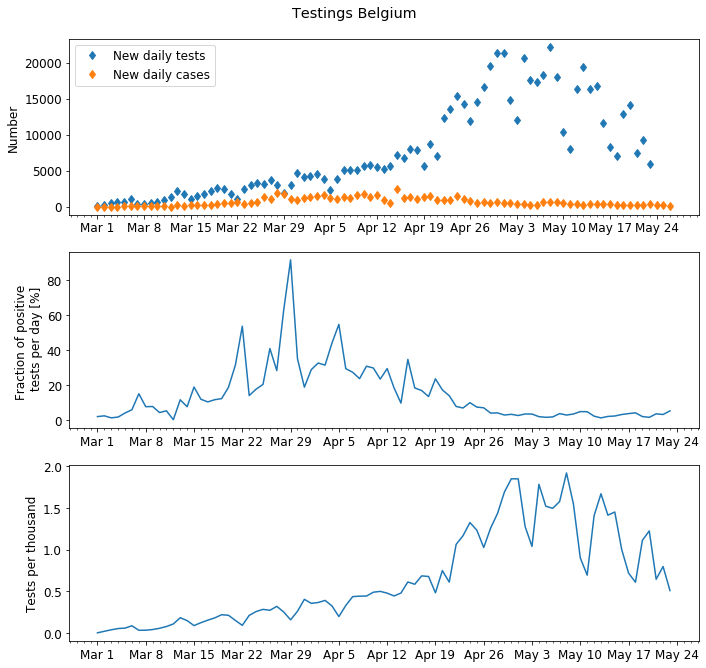

In [18]:
fig, ax = plt.subplots(3,figsize=(10,9))
weeks = [date_first_testings + datetime.timedelta(days=i*7) for i in range(14)]

fig.suptitle("Testings "+this_country,y=1.03)
# Tests vs cumulative cases
ax[0].plot(tests_new[weeks[0]:weeks[13]],"d",label="New daily tests")
ax[0].plot(cases_new[weeks[0]:weeks[13]],"d",label="New daily cases")
ax[0].set_ylabel("Number")
cov19.plot._format_date_xticks(ax[0])
ax[0].legend()

# Percent
percent = cases_new/tests_new*100
ax[1].plot(percent)
ax[1].set_ylabel("Fraction of positive \n tests per day [%]")
cov19.plot._format_date_xticks(ax[1])

# New
ax[2].plot(tests_per_thousand)
ax[2].set_ylabel("Tests per thousand")
cov19.plot._format_date_xticks(ax[2])
fig.tight_layout()
plt.savefig("./figures/testings_"+this_country+".png",bbox_inches='tight')